# Exercice DataSet & Algo modèle linéaire

## Algo avec 1 X et 1 Y

<strong> Problématique : -> Plus un pokémon a de points de vie , plus son nombre de points d'attaques augmente ?

<strong> <p style="font-size: 150%"> DataCleaning & Importation CSV

In [790]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [791]:
dataCSV = "pokemon.csv"

data = pd.read_csv(dataCSV, usecols = ['id', 'Name', 'HP', 'Attack'])

In [792]:
data.isnull().all()

id        False
Name      False
HP        False
Attack    False
dtype: bool

In [793]:
data.dtypes

id         int64
Name      object
HP         int64
Attack     int64
dtype: object

In [794]:
data.head(10)

,id,Name,HP,Attack
0,1,Bulbasaur,45,49
1,2,Ivysaur,60,62
2,3,Venusaur,80,82
3,4,Charmander,39,52
4,5,Charmeleon,58,64
5,6,Charizard,78,84
6,7,Squirtle,44,48
7,8,Wartortle,59,63
8,9,Blastoise,79,83
9,10,Caterpie,45,30


In [795]:
data.shape

(1061, 4)

<strong> <p style="font-size: 150%"> CREATE X & Y

In [796]:
#X := HP Pokemon
#Y := Attack Pokemon

#Create Var X & Y

X = data[['HP']]
Y = data[['Attack']]

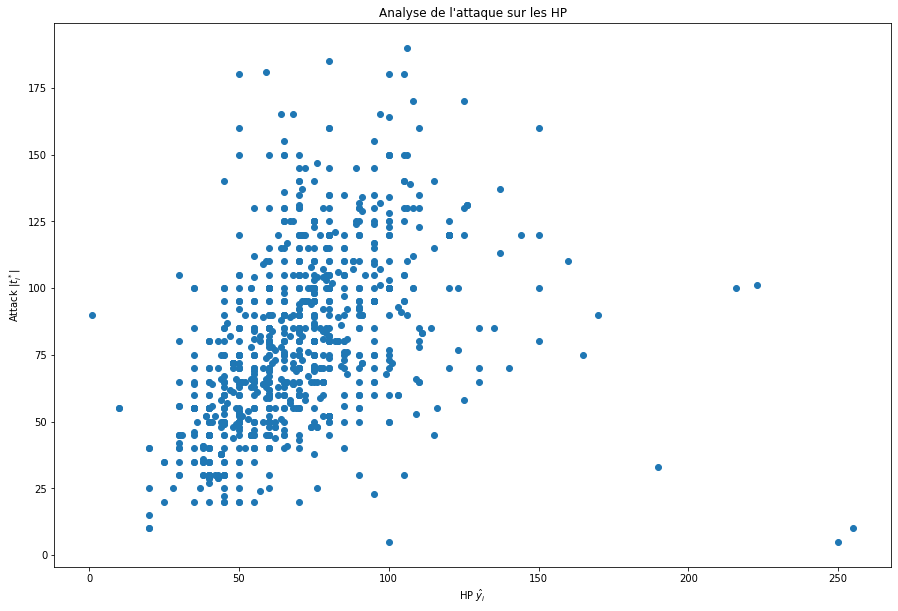

In [842]:
plt.figure(figsize=(15, 10))

plt.title("Analyse de l'attaque sur les HP")
plt.xlabel("HP $\hat{y}_i$")
plt.ylabel("Attack $|t_i^*|$")

plt.scatter(X, Y)

<strong> <p style="font-size: 150%"> CREATE SPLIT WITH SKLEARN


In [901]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [902]:
X_train.head(5)

,HP
695,58
171,20
905,60
482,100
488,80


In [903]:
Y_train.head(5)

,Attack
695,89
171,40
905,79
482,120
488,80


<strong> <p style="font-size: 150%"> CREATE LinearRegression


In [904]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

clf = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [905]:
clf.fit(X_train, Y_train)

LinearRegression()

<strong> <p style="font-size: 150%"> Print Coef


In [906]:
print('Coef : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coef :  [[0.48359517]]
Intercept :  [45.39688205]


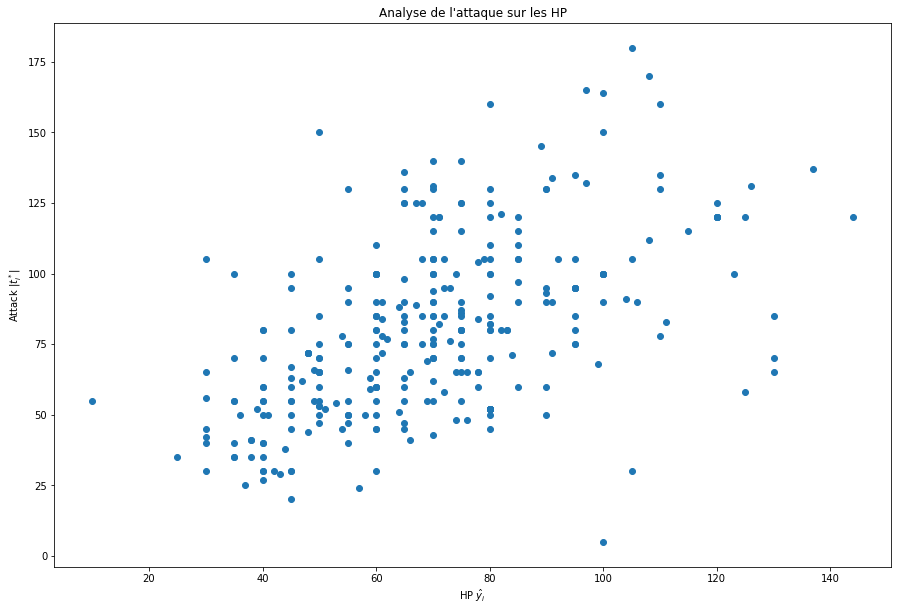

In [907]:
plt.figure(figsize=(15, 10))

plt.title("Analyse de l'attaque sur les HP")
plt.xlabel("HP $\hat{y}_i$")
plt.ylabel("Attack $|t_i^*|$")

plt.scatter(X_test, Y_test)

<strong> <p style="font-size: 150%"> Prédiction sur X & Squared_error


In [908]:
from sklearn.metrics import mean_squared_error, r2_score

In [909]:
Y_prediction = clf.predict(X_test)

In [910]:
Y_prediction

array([[ 62.32271283],
       [ 74.41259197],
       [ 86.5024711 ],
       [ 84.08449527],
       [ 80.21573395],
       [ 62.32271283],
       [ 79.24854362],
       [ 81.18292428],
       [ 59.90473701],
       [108.26425354],
       [ 81.66651945],
       [ 70.06023548],
       [ 77.31416296],
       [ 81.66651945],
       [103.42830188],
       [ 63.28990317],
       [ 69.57664031],
       [ 76.83056779],
       [ 83.11730494],
       [ 64.74068866],
       [ 71.99461614],
       [ 69.57664031],
       [ 79.24854362],
       [ 88.92044693],
       [ 67.15866449],
       [ 76.34697263],
       [101.01032606],
       [ 80.69932912],
       [ 74.41259197],
       [ 79.73213878],
       [ 83.11730494],
       [ 71.99461614],
       [ 92.30561308],
       [ 79.24854362],
       [ 69.57664031],
       [ 79.24854362],
       [ 89.40404209],
       [ 78.28135329],
       [ 74.41259197],
       [ 91.33842275],
       [ 67.15866449],
       [ 79.24854362],
       [ 69.57664031],
       [ 85

In [911]:
print('Mean Squared Error : %.2f' % mean_squared_error(Y_test, Y_prediction))

Mean Squared Error : 708.88


In [912]:
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_prediction))

Coefficient of determination: 0.25


In [840]:
import scipy
Attack_resi = np.abs(Y_train - Y_prediction)
H = np.matmul(X_train, np.linalg.solve(np.dot(X_train.T, X_train), X_train.T))
standart_attack = np.asarray([Attack_resi[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(Attack_resi))])

plt.title("Analyse de l'attaque sur les HP")
plt.xlabel("HP $\hat{y}_i$")
plt.ylabel("Attack $|t_i^*|$")

plt.scatter(y_prediction)

ValueError: Unable to coerce to DataFrame, shape must be (848, 1): given (213, 1)